## Data Collection

In [18]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import pandas as pd

# load dataset
data = gutenberg.raw('shakespeare-hamlet.txt')

#save to file
with open('hamlet.txt', 'w') as file:
    file.write(data)

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/sujairibrahim/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


## Data Preprocessing

In [42]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


with open('hamlet.txt', 'r') as file:
    text = file.read().lower()

# Tokenization - creating indxes for word
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
total_words

4818

In [20]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [21]:
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequences = token_list[: i+1]
        input_sequences.append(n_gram_sequences)

In [22]:
input_sequences

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [23]:
# Padding sequences to ensure uniform input size
max_sequence_length = max(len(seq) for seq in input_sequences)
max_sequence_length

14

In [24]:
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_length, padding='pre'))
input_sequences

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]], dtype=int32)

## Create Predictors and label

In [25]:
import tensorflow as tf
x,y = input_sequences[:,:-1],input_sequences[:,-1]


In [26]:
x

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]], dtype=int32)

In [27]:
y

array([ 687,    4,   45, ..., 1047,    4,  193], dtype=int32)

In [28]:
# y want to be converted to categories becase the words can be repeated
y = tf.keras.utils.to_categorical(y, num_classes=total_words)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Split Dataset to Train & Test

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

## Train LSTM RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout

model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_shape=(max_sequence_length-1,)))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words, activation="softmax"))


# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()




/Users/sujairibrahim/ML-Projects/LSTM-Next-Word-Prediction/lstmenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 14, 100)        │       481,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 14, 150)        │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4818)           │       486,618 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,219,418 (4.65 MB)

 Trainable params: 1,219,418 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [ ]:
## Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [33]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1)



Epoch 1/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.0289 - loss: 7.1281 - val_accuracy: 0.0334 - val_loss: 6.7878
Epoch 2/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.0371 - loss: 6.4350 - val_accuracy: 0.0391 - val_loss: 6.8615
Epoch 3/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.0432 - loss: 6.3067 - val_accuracy: 0.0492 - val_loss: 6.9020
Epoch 4/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.0521 - loss: 6.1188 - val_accuracy: 0.0511 - val_loss: 6.9528
Epoch 5/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.0550 - loss: 6.0431 - val_accuracy: 0.0581 - val_loss: 6.9778
Epoch 6/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.0658 - loss: 5.8463 - val_accuracy: 0.0668 - val_loss: 6.9829
Epoch 7/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.0741 - loss: 5.6986 - val_accuracy: 0.0707 - val_loss: 7.0379
Epoch 8/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.0815 - loss: 5.5374 - 

In [34]:
history_1 = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4862 - loss: 2.3363 - val_accuracy: 0.0503 - val_loss: 11.8280
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4877 - loss: 2.3195 - val_accuracy: 0.0492 - val_loss: 11.9133
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4991 - loss: 2.2893 - val_accuracy: 0.0495 - val_loss: 11.9336
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4956 - loss: 2.2684 - val_accuracy: 0.0497 - val_loss: 12.0298
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5046 - loss: 2.2313 - val_accuracy: 0.0468 - val_loss: 12.0945
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5096 - loss: 2.1967 - val_accuracy: 0.0472 - val_loss: 12.1744
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5135 - loss: 2.1829 - val_accuracy: 0.0523 - val_loss: 12.2276
Epoch 8/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5264 - 

In [36]:
# Access the arrays
train_loss     = history_1.history['loss']
val_loss       = history_1.history['val_loss']
train_accuracy = history_1.history['accuracy']
val_accuracy   = history_1.history['val_accuracy']

# Example: print the final epoch results
print(f"Final epoch -> loss: {train_loss[-1]:.4f}, acc: {train_accuracy[-1]:.4f}, "
      f"val_loss: {val_loss[-1]:.4f}, val_acc: {val_accuracy[-1]:.4f}")


Final epoch -> loss: 0.9671, acc: 0.7670, val_loss: 16.3148, val_acc: 0.0439


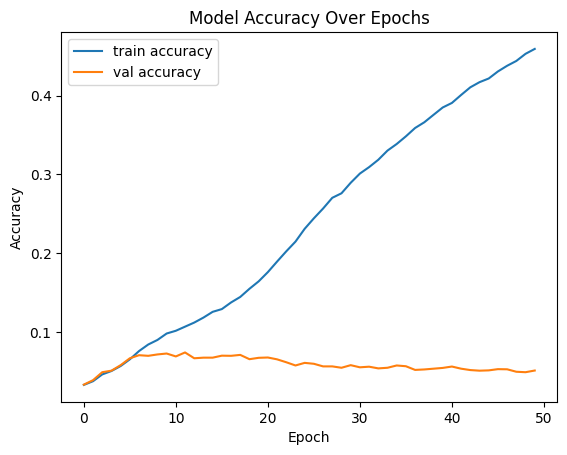

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()


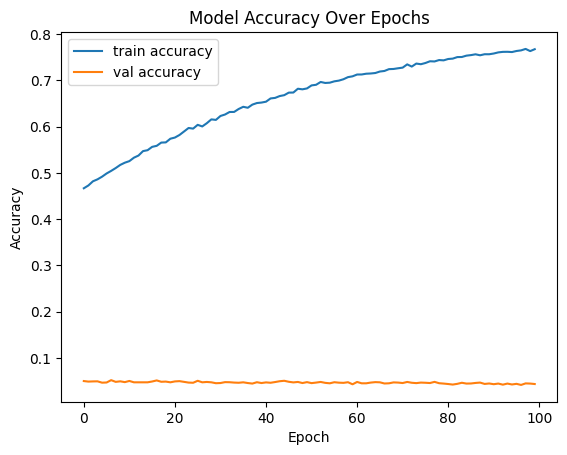

In [38]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['accuracy'], label='train accuracy')
plt.plot(history_1.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()


In [39]:
print("Number of training samples:", len(x_train))
print("Number of validation samples:", len(x_test))


Number of training samples: 20585
Number of validation samples: 5147


In [40]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (20585, 13)
y_train: (20585, 4818)
x_test: (5147, 13)
y_test: (5147, 4818)


## Function to Predict Next Word

In [51]:
def predict_next_word(model, tokenizer, text, max_sequence_length):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_length:
        token_list = token_list[-(max_sequence_length-1):]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None
# Example usage
text = "My name"
predicted_word = predict_next_word(model, tokenizer, text, max_sequence_length)
print(f"Predicted next word for '{text}': {predicted_word}")

Predicted next word for 'My name': be


In [52]:
input_text = "I need to"
print(f"Input text: {input_text}")
max_sequence_length = model.input_shape[1] + 1  # +1 for the target word
next_word = predict_next_word(model, tokenizer, input_text, max_sequence_length)
print(f"Predicted next word: {next_word}")

Input text: I need to
Predicted next word: the


## Save the model

In [53]:
model.save('next_word.h5')
#save tokenizer
import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
# Load the tokenizer